# Topics

## 1. Fourier Descriptor  

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from pdb import set_trace
from copy import copy

import matplotlib.image as mpimg

In [2]:
'''Reminder: Complex Numbers'''
a = 1.
b = 2.
# It's not c = a + b*j!!
c = a + b*1j

print(c)

(1+2j)


## Breakout Exercise: Draw a square, by using numpy arrays and matplotlib.  You should be able to specify: 

- ### the number of point per side
- ### the coordinates of the lower left corner and upper right corner
- ###  go around the square in counter-clockwise fashion

In [3]:
def draw_square(num_pts, lower_left, upper_right):
    # Bottom line
    x0 = np.linspace(lower_left[0], upper_right[0], num_pts)
    y0 = np.ones(num_pts) * lower_left[1]
    
    # Right line
    x1 = np.ones(num_pts) * upper_right[0]
    y1 = np.linspace(lower_left[1], upper_right[1], num_pts)
    
    # Top line
    x2 = np.linspace(upper_right[0], lower_left[0], num_pts)
    y2 = np.ones(num_pts) * upper_right[1]
    
    # Left line
    x3 = np.ones(num_pts) * lower_left[0]
    y3 = np.linspace(upper_right[1], lower_left[1], num_pts)
    
    x = np.concatenate((x0,x1,x2,x3))
    y = np.concatenate((y0,y1,y2,y3))

    plt.figure(figsize=(5,5))
    plt.plot(x,y)
    plt.show
    

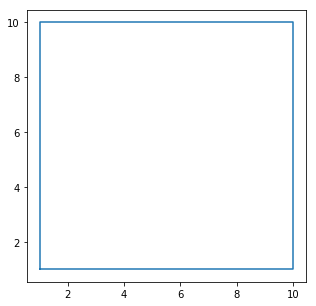

In [4]:
# draw_square(100, (-1,-1), (1,1))
draw_square(100, (1,1), (10,10))


<function matplotlib.pyplot.show>

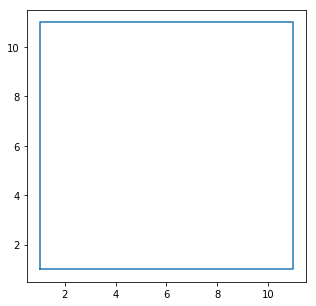

In [5]:
xlo = 1
xhi = 11
ylo = 1
yhi = 11

num_pts = 100
sz = xhi - xlo

x1 = np.linspace(xlo, xhi, num_pts)
y1 = np.ones(num_pts) * ylo

x2 = np.ones(num_pts) * xhi
y2 = np.linspace(ylo, yhi, num_pts)

x3 = np.linspace(xhi, xlo, num_pts)
y3 = np.ones(num_pts) * yhi

x4 = np.ones(num_pts) * xlo
y4 = np.linspace(yhi, ylo, num_pts)


x = np.concatenate((x1,x2,x3,x4))
y = np.concatenate((y1,y2,y3,y4))

plt.figure(figsize=(5,5))
plt.plot(x,y)
plt.show

## Fourier Descriptor (FD): FT of 

## $z = x + iy$, 
## where x and y are the coordinates of the outline of a shape.


Spatial interval: 0.1000
lowest possible (non-zero) frequency: 0.0250
Sampling rate: 10.0000
Highest possible (Nyquist) frequency: 5.0000
Highest k kept:0.1250
FD components kept:11


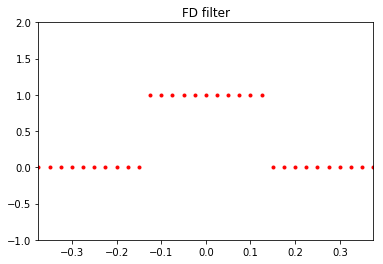

k after filtering:  [ 0.     0.025  0.05   0.075  0.1    0.125 -0.125 -0.1   -0.075 -0.05
 -0.025]


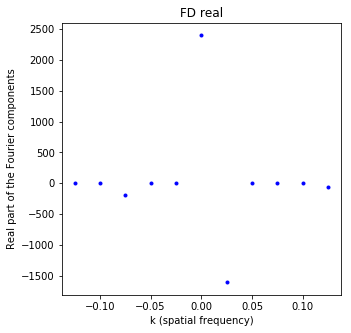

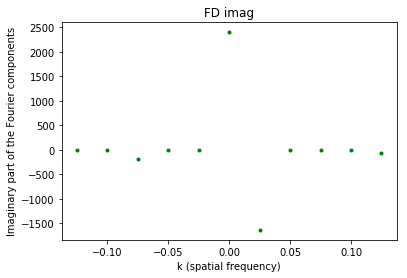

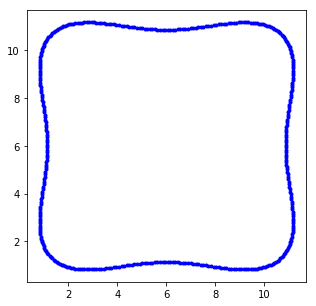

In [6]:
%matplotlib inline

'''

Fourier Descriptor (FD): FT of (x + 1j*y), where x and y are the coordinates 
of the outline of a shape.

There is a subtle point:
without the [filt] step there is an artifical point at (0, 0) in Fourier space
which doesn't contribute to the reconstruction.  Note the the (0, 0) point is 
completely artificial -- the first 0 does NOT correspond to 0 freq, but instead
it's the result of k*filt!


'''


import numpy as np
N = len(x)

z = x + y*1j

Z = np.fft.fft(z)
# spatial resolution 
d = sz / num_pts
print('Spatial interval: {:.4f}'.format(d))
k = np.fft.fftfreq(len(z), d = d)

# "fundamental frequency" (lowest possible spatial frequency): 1/circumference
# this is equivalent to f1 = 1/T for sound
k_lo = 1/(4*sz)
print("lowest possible (non-zero) frequency: {:.4f}".format(k_lo))


# Sampling rate and Nyquist frequency
sr = 1/d
print("Sampling rate: {:.4f}".format(sr))
k_hi = sr/2
print("Highest possible (Nyquist) frequency: {:.4f}".format(k_hi))



order_keep = 5
k_keep = order_keep*k_lo
filt = np.abs(k) <= k_keep
print("Highest k kept:{:.4f}".format(k_keep))
print("FD components kept:{:d}".format(filt.sum()))

plt.title('FD filter')
plt.plot(k, filt, 'r.' )
plt.xlim(-k_keep*3, k_keep*3)
plt.ylim(-1, 2)
plt.show()


# Recovery -- note how things change with more and more Fourier components included
# Note: 
# 1. How few components are needed to recover the basic shape
# 2. A *lot* of fourier components go into get the sharp corners right!  
# (Get those right require high freq terms; but they are not necessary for 
# pattern recognition.)

Z *= filt
k *= filt

# note the order: from 0 to the highest frequency,
# then highest negative frequency down to lowest negative frequency
print("k after filtering: ", k[filt])

plt.figure(figsize = (5, 5))
plt.title('FD real')
plt.plot(k[filt], Z.real[filt], 'b.')
plt.xlim([-k_keep*1.1, k_keep*1.1])
plt.xlabel('k (spatial frequency)')
plt.ylabel('Real part of the Fourier components')
# plt.xlim([-1, 1])
# plt.ylim([-100, 100])


plt.figure()
plt.title('FD imag')
plt.plot(k[filt], Z.imag[filt], 'g.')
plt.xlim([-k_keep*1.1, k_keep*1.1])
plt.xlabel('k (spatial frequency)')
plt.ylabel('Imaginary part of the Fourier components')

# plt.xlim([-1, 1])
# plt.ylim([-100, 100])

z_rec = np.fft.ifft(Z)

x_rec = z_rec.real
y_rec = z_rec.imag

plt.figure(figsize = (5, 5))
plt.plot(x_rec, y_rec, 'b.')
plt.show()



## Breakout Exercise: Write the following 4 useful functions:

### 1. FD(x, y, plot_FD = False, y_lim = None) 
- ###     if plot_FD is True, plot the real and imaginary parts of FD on the same figure.
- ###     if y_lim is None, autoscale.  If it's specified, then set the vertical scale to be between              -y_lim and +y_lim.
- ###     returns Z (i.e., the FD's) and k (the spatial frequency).

### 2. filt_FD(Z, k, k_keep, no_zeroth = False) 
- ###      returns Z\*filt, k\*filt.  The truth table of filt depends on k_keep, of course.
- ###      If no_zeroth = True, the zeroth order of FD
### 3. recover_shape(Z)
### 4. plot_shape(x, y, plot_style = 'b.'):



In [46]:
def FD(x, y, plot_FD = False, y_lim = None): 

    N = len(x)

    z = x + y*1j
    
    Z = np.fft.fft(z)
    # spatial resolution
    d = len(Z) / num_pts
    print('Spatial interval: {:.4f}'.format(d))
    k = np.fft.fftfreq(len(z), d = d)
#     k_lo = np.abs(k[np.argsort()])
    if plot_FD == True:
        plt.plot(k, Z.real)
        plt.xlim(-k_keep*3, k_keep*3)
        if y_lim != None:
            plt.plot(-y_lim, y_lim)
            plt.show()
        plt.plot(k, Z.imag)
        plt.xlim(-k_keep*3, k_keep*3)
        if y_lim != None:
            plt.plot(-y_lim, y_lim)
            plt.show()
        
    return Z, k

def filt_FD(Z, k, k_keep, no_zeroth = False):
    filt = np.abs(k) <= k_keep
    return Z*filt, k*filt
    
def recover_shape(Z):
    z_rec = np.fft.ifft(Z)
    x_rec = z_rec.real
    y_rec = z_rec.imag
    return x_rec, y_rec
    
def plot_shape(x, y, plot_style = 'b.'):
    plt.figure(figsize = (5, 5))
    plt.plot(x_rec, y_rec, 'b.')
    plt.show()

Spatial interval: 4.0000


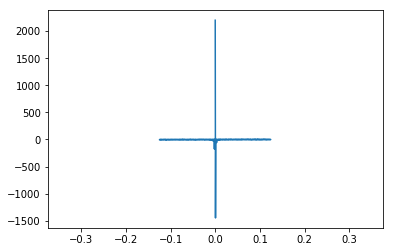

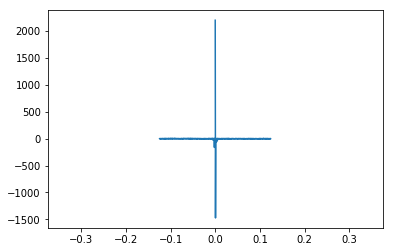

0.000625


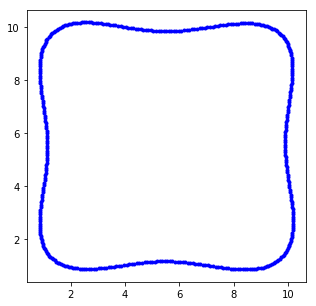

In [47]:
'''

Check to see if the functinos in breakout1 work.

To emphasize:

- 0th order: average (or sum, depending on DFT convention adopted) 
of all points

'''
#************************************Main Program*************************************
# Note: this is how most programs should be written.
Z, k = FD(x, y, plot_FD=True, y_lim = 10)
k_lo = np.abs(k[np.argsort(np.abs(k))][1])
print(k_lo)
order_keep = 5
Z_filt, k = filt_FD(Z, k, order_keep*k_lo)
x_rec, y_rec = recover_shape(Z_filt)
plot_shape(x_rec, y_rec)


## Breakout Exercise:

### Draw a square whose edges have noise

In [9]:
'''
Breakout Exercise:

Noisy square
'''


import numpy as np
import matplotlib.pyplot as plt

num_pts = 100
sz = 10
noiz_sz = 0.1

x1 = np.linspace(1, sz, num_pts)
x2 = np.ones(num_pts)*sz
x3 = np.linspace(sz, 1, num_pts)
x4 = np.ones(num_pts)
x = np.concatenate((x1, x2, x3, x4))
x += np.random.randn(len(x))*noiz_sz



y1 = np.ones(num_pts)
y2 = np.linspace(1, sz, num_pts)
y3 = np.ones(num_pts)*sz
y4 = np.linspace(sz, 1, num_pts)
y = np.concatenate((y1, y2, y3, y4))
y += np.random.randn(len(y))*noiz_sz


plot_shape(x, y, title = 'Noisy Square')



NameError: name 'plot_shape' is not defined

In [10]:
Z, k = FD(x, y, plot_FD=True, y_lim = 10)
Z_filt, k_filt = filt_FD(Z, k, 3*k_lo)
x_rec, y_rec = recover_shape(Z_filt)
plot_shape(x_rec, y_rec)


NameError: name 'FD' is not defined

## End of week11-1

## The Order of the Points Matters

In [ ]:
%matplotlib inline
'''

Two Purposes:

1. Introduce the idea of an edge detector.
2. Show the order of points matters a great deal.


'''

# ----------> Below are two new imports <------------
from scipy import ndimage as ndi
from skimage import feature


# Generate noisy image of a square
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

# rotation
#im = ndi.rotate(im, 15, mode='constant')
# Gaussian smoothing
im = ndi.gaussian_filter(im, 4)
# Add noise
im += 0.1*np.random.random(im.shape)

# Compute the Canny filter for two values of sigma
edges = feature.canny(im, sigma=3)

# display results -- creating figure and subplots at the same time.
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3), sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.jet)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)


ax2.imshow(edges, cmap=plt.cm.gray, interpolation='none')
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9,
                    bottom=0.02, left=0.02, right=0.98)

plt.show()

In [ ]:
print(edges.shape, edges.dtype)

In [ ]:
%matplotlib inline
'''Converting edge image to arrays'''


import numpy as np
import matplotlib.pyplot as plt
x_arr = []
y_arr = []

for i in range(edges.shape[0]):
    for j in range(edges.shape[1]):
        if edges[i, j] > 0:
            x_arr.append(i)
            y_arr.append(j)

x_arr = np.array(x_arr)
y_arr = np.array(y_arr)
plt.plot(x_arr, y_arr, 'k.')

plt.show()

In [ ]:
Z = FD(x_arr, y_arr, plot_FD=True, y_lim = 1000)
Z_filt = filt_FD(Z, 10)
x_rec, y_rec = recover_shape(Z_filt)
plot_shape(x_rec, y_rec)

# Uh oh, what's going on????


In [ ]:
'''

Order the points in polar coordinates so that they are sequential.

Note the usage of arctan2() again.

'''

import numpy as np
import matplotlib.patches as patches

pts = zip(x_arr, y_arr)
# compute centroid
cent=(sum([p[0] for p in pts])/len(pts),sum([p[1] for p in pts])/len(pts))
# sort by polar angle
pts.sort(key=lambda p: np.arctan2(p[1]-cent[1],p[0]-cent[0]))

x = np.array([p[0] for p in pts])
y = np.array([p[1] for p in pts])

# plot points
plt.scatter(x, y)
plt.show()

In [ ]:
%matplotlib inline

'''
With points in the right order, all is right.

'''

Z = FD(x, y, plot_FD=True, y_lim = 1000)
Z_filt = filt_FD(Z, 5)
x_rec, y_rec = recover_shape(Z_filt)
plot_shape(x_rec, y_rec)



## Use Contour Plots 
## (The points are always arranged in the right order)

In [ ]:
%matplotlib inline
'''


To get the order of the points right the first time: Using contours.

- Advantage: Get the order right and can deal with concave polygons and polygons with holes 
  very easily (compared with edge detector)
- Disadvantage: Harder to deal with a noisy image (compared with edge detector)
- For OCR with hi-def images, no problem -- for more sophisticated OCR techniques, 
  next semester!


'''

plt.figure()
plt.imshow(im, cmap=plt.cm.gray)
plt.title('The Image')

# Note: by convention, in this case, y values comes from the 0th index.
# Otherwise one has to transpose the image and the contour will appear sideways 
# (no an issue here since it's a square).
x = np.arange(im.shape[1])
y = np.arange(im.shape[0])
# make 2D coordinate grid 
X, Y = np.meshgrid(x, y)

# Find and plot contours
plt.figure()
# Note the peculiarity of needing the transpose operation.
plt.title('Contour')
CS = plt.contour(X, Y, im, 1)
levels = CS.levels
print('contour level', levels)

# Find the (x, y) coodinates of the contour lines.
cs_paths = CS.collections[0].get_paths()

print('number of contour path', len(cs_paths))
p = cs_paths[0]
v = p.vertices
x_arr = v[:,0]
y_arr = v[:,1]

plt.figure()
plt.title("Verify the contour points are correct")
plt.scatter(x_arr, y_arr)

plt.show()


## A More Interesting Example: The Letter "E"

In [ ]:
%matplotlib inline
'''

Use the letter "E" as the example case.

Given an image of a letter, the code below will find it's shape (complext) vector 
by using contour.


'''

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from skimage import feature


im = mpimg.imread('letterE.jpg')

# Take only one of RGB channels
im = im[:, :, 0]


plt.figure()
plt.imshow(im, cmap=plt.cm.gray)
plt.title('The Image')

# Note: x is associated with index 1 and y with 0 -- it's a better choice here;
# it's simply a matter of convention.
x = np.arange(im.shape[1])
y = np.arange(im.shape[0])
# make 2D coordinate grid 
X, Y = np.meshgrid(x, y)

# Find and plot contours
plt.figure()
plt.title('Contour')
CS = plt.contour(X, Y, im, 1)
levels = CS.levels
print('contour level', levels)

# Find the (x, y) coodinates of the contour lines.
cs_paths = CS.collections[0].get_paths()

print('number of contour path', len(cs_paths))
p = cs_paths[0]
v = p.vertices
x = v[:,0]
y = v[:,1]

plt.figure()
plt.title("Verify the contour points are correct")
plt.scatter(x, y)

plt.show()


In [ ]:
Z = FD(x, y, plot_FD=True, y_lim = 1000)

# Let's see how order = 5 will do, and how about 10?
# Note: the Nyquist index is 1258, and yet we've only gone up to n = 10!
# Put it another way: there are 1258*2 pairs of (x, y) in the contour, but it turns out
# we only need 10*2*2 (remember each FD is a complex number), or 40 numbers to capture 
# the essence of the shape!
order = 10
Z_filt = filt_FD(Z, order)
x_rec, y_rec = recover_shape(Z_filt)
plot_shape(x_rec, y_rec)


##  Breakout 2: Write a function extract_shape_v0(im_file, blowup = 1., plot_img = False, plot_contour = False, plot_contour_pts = False)

### - returns the x and y arrays of the outline (contour) of the shape.

### - should check whether the image has a single and mutliple channels.  If the later, take the 0th (usu. R) channels

### - should have the ability of blowing up the image by a factor specified by blowup.



In [ ]:
'''Test to see if the function extract_shape_v0() works'''
x, y = extract_shape_v0('letterE.jpg')
plot_shape(x, y)


## The Meaning of the Terms in FD -- Order by Order

### The descriptors Z[k] (Fourier Desriptors, or FD's) are components of a shape in frequency space (or more precisely, "k-space"): Components with low k provides low frequency information -- an approximation to the shape, and components with higher frequencies provide details.

### 1. Translational Invariance.  For k = 0, Z[k] represents the position of the center of gravity of the shape. This term is not interesting for the shape description. Without this term, the description won't be affected by a translation of the shape.  



### 2. Size Invariance.  The first frequency component, Z[k] for k = 1 (more precisely, the first and last terms), describes the size of the shape. If all the other components are set to zero, the shape becomes an ellipse (actually, a N-sided polygon).  The product of the first and last terms -- Z[1] and Z[-1] in Python notation -- is related to the area of the ellipse (basically area = pi\*a\*b -- you can think of the these two terms as being related to the major and minor axes of an ellipse [I think Z[1] and Z[-1] may be proportionally related to a and b -- just look at HW07, the size-normalized hole for the number 6 is huge; this could be because the area is small and thus the size-normalized shape is huge.]).  One can use this component to normalize the other Fourier descriptors.  This way, two identical shapes, but with different sizes, can recognized as such.  To the first order (literally!):  all enclosed shapes are ellipses with the major and minor axes determined by the aspect ratio and the overall size of the shape)



### 3. Convavity.  The seond frequency components, Z[2] and Z[-2], together show which way the shape bends ("concavity").



### 4. The other frequency components will make higher frequency alterations.  



### 5. The phase of Z[k] describes the place where the higher order corrections are applied -- just like in linear FT, the phase in sin/cos will affect where the corrections will be applied.  

### 6. Rotational Invariance.  Related to \#5, multiplying Z[k] by an additional phase factor amounts to rotating the shape.  This means |Z[k]|'s are the same whichever the orientation of the shape may be.


(Adapted from http://www.tsi.telecom-paristech.fr/pages/enseignement/ressources/beti/descript_fourier/Part1.htmlf)

In [ ]:
'''
1. Translational Invariance Example
'''

x, y = extract_shape_v0('letterE.jpg')
Z = FD(x, y, plot_FD=True, y_lim = 1000)

order = 10
# Observe the effects of whether or not we include the zeroth order term.
#Z_filt = filt_FD(Z, order)
Z_filt = filt_FD(Z, order, no_zeroth=False)
x_rec, y_rec = recover_shape(Z_filt)
plt.figure()
plt.plot(x, y)
plt.plot(x_rec, y_rec)
plt.show()


In [ ]:
'''
2. Size Invariance

- without normalization
'''

x_L, y_L = extract_shape_v0('letterE.jpg', blowup = 10.)
Z = FD(x_L, y_L, plot_FD=True, y_lim = 1000)

order = 10
Z_filt = filt_FD(Z, order)
x_rec, y_rec = recover_shape(Z_filt)
plt.figure()
plt.plot(x_L, y_L)
plt.plot(x_rec, y_rec)
plt.show()


In [ ]:
'''
2. Size Invariance

Comparing two E's with very different sizes: Without and with normalization. 
'''

def size_norm(Z):
    return Z/np.sqrt( np.abs(Z[1])*np.abs(Z[-1]) )

x_L, y_L = extract_shape_v0('letterE.jpg', blowup = 10.)
Z = FD(x_L, y_L)

order = 10
Z_filt = filt_FD(Z, order)
#normalization
Z_filt = size_norm(Z_filt)
x_L_rec, y_L_rec = recover_shape(Z_filt)


x, y = extract_shape_v0('letterE.jpg', blowup = 1.)
Z = FD(x, y)

order = 10
Z_filt = filt_FD(Z, order)
# normalization
Z_filt = size_norm(Z_filt)
x_rec, y_rec = recover_shape(Z_filt)


plt.figure()
plt.plot(x_rec, y_rec, 'gx')   # after normalization, use 'gx' as plot symbol
plt.plot(x_L_rec, y_L_rec, 'b-', lw = 2)
plt.show()


In [ ]:
'''
3. Concavity (and the beginning of "order-by-order")

- 0th: Centroid
- 1st: Size
- 2nd: Convavity.

'''

x, y = extract_shape_v0('letterE.jpg')
Z = FD(x, y)

order = 0
Z_filt = filt_FD(Z, order, no_zeroth=False)
x_rec, y_rec = recover_shape(Z_filt)
plt.figure()
plt.plot(x, y)
plt.plot(x_rec, y_rec, 'gx')
plt.show()

order = 1
Z_filt = filt_FD(Z, order, no_zeroth=False)
x_rec, y_rec = recover_shape(Z_filt)
plt.figure()
plt.plot(x, y)
plt.plot(x_rec, y_rec, 'g.')
plt.show()

order = 2
Z_filt = filt_FD(Z, order, no_zeroth=False)
x_rec, y_rec = recover_shape(Z_filt)
plt.figure()
plt.plot(x, y)
plt.plot(x_rec, y_rec, 'g.')
plt.show()

In [ ]:
'''
4. Higher Order Terms (and the continuation of "order-by-order")

'''


order = 5
Z_filt = filt_FD(Z, order, no_zeroth=False)
x_rec, y_rec = recover_shape(Z_filt)
plt.figure()
plt.plot(x, y)
plt.plot(x_rec, y_rec, 'g.')
plt.show()

order = 10
Z_filt = filt_FD(Z, order, no_zeroth=False)
x_rec, y_rec = recover_shape(Z_filt)
plt.figure()
plt.plot(x, y)
plt.plot(x_rec, y_rec, 'g.')
plt.show()


In [ ]:
'''
Rotational Invariance.

Multiplying Z[k] by an additional phase factor amounts to rotating the shape. 

'''


x, y = extract_shape_v0('letterE.jpg')
# rotate shape in configuration space
z = x + 1j*y
z *= np.exp(1j*np.pi/3.)

x_pr, y_pr = z.real, z.imag

Z_pr = FD(x_pr, y_pr)


order = 10
Z_filt = filt_FD(Z_pr, order)
x_rec, y_rec = recover_shape(Z_filt)
plt.figure()
plt.plot(x_pr, y_pr)
plt.plot(x_rec, y_rec, 'gx')
plt.show()


In [ ]:
'''
Rotational Invariance.

Multiplying Z[k] by an additional phase factor amounts to rotating the shape...
the two shapes, though identical, would have different FD's.


'''


x, y = extract_shape_v0('letterE.jpg')

order = 10

Z = FD(x, y)
Z_filt = filt_FD(Z, order)
Z_filt = size_norm(Z_filt)
x_rec, y_rec = recover_shape(Z_filt)
plt.figure()
plt.plot(x_rec, y_rec)


# rotate shape in configuration space
z = x + 1j*y
z *= np.exp(1j*np.pi/3.)
x_pr, y_pr = z.real, z.imag
Z_pr = FD(x_pr, y_pr)

Z_filt_pr = filt_FD(Z_pr, order)
Z_filt_pr = size_norm(Z_filt_pr)

x_rec, y_rec = recover_shape(Z_filt_pr)
plt.plot(x_rec, y_rec)
plt.show()

# Clearly the FD would be different for the two E's.
plt.figure()
plt.title("10 size-normalized FD's for 2 E's with Different Orientations")
plt.plot(Z_filt.real, Z_filt_pr.real, 'r.')
plt.plot(Z_filt.imag, Z_filt_pr.imag, 'yx')
plt.show()

In [ ]:
'''
Rotational Invariance.

Multiplying Z[k] by an additional phase factor amounts to rotating the shape...
This means |Z[k]|'s are the same whichever the orientation of the shape may be.

'''


x, y = extract_shape_v0('letterE.jpg')

order = 10

Z = FD(x, y)
Z_filt = filt_FD(Z, order)
Z_filt = size_norm(Z_filt)
x_rec, y_rec = recover_shape(Z_filt)
plt.figure()
plt.plot(x_rec, y_rec)


# rotate shape in configuration space
z = x + 1j*y
z *= np.exp(1j*np.pi/3.)
x_pr, y_pr = z.real, z.imag
Z_pr = FD(x_pr, y_pr)

Z_filt_pr = filt_FD(Z_pr, order)
Z_filt_pr = size_norm(Z_filt_pr)

x_rec, y_rec = recover_shape(Z_filt_pr)
plt.plot(x_rec, y_rec)
plt.show()

# But the |FD| are the same.  We thus have achieved rotational invariance!
plt.figure()
plt.title("10 size-normalized FD's for 2 E's with Different Orientations")
plt.plot(np.abs(Z_filt), np.abs(Z_filt_pr), 'r.')
plt.show()

## Breakout 3 
## Write a function get_FD_abs(x, y, order = 10, norm = True, no_zeroth = True)

### - returns fd_mag, x_rec, y_rec

## What's All This Good for??
## Shape recognition regardless of location, size or orientation!
## ...the beginning of computer vision!
## E.g., Traffic Signs -- HW

In [ ]:
'''To tell E from H'''

order = 10

def get_FD_abs(x, y, order = 10):
    '''Finds the Fourier Descriptors and the recovered x and y for a shape.'''
    Z = FD(x, y)
    print('len(Z)', len(Z))

    Z_filt = filt_FD(Z, order)
    Z_filt = size_norm(Z_filt)
    print('len(Z_filt)', len(Z_filt))
    x_rec, y_rec = recover_shape(Z_filt)

    # throw away zero terms
    fd_mag = np.abs(Z_filt[Z_filt != 0])
    
    return fd_mag, x_rec, y_rec

x, y = extract_shape_v0('letterE.jpg')
fd_E, x_rec_E, y_rec_E = get_FD_abs(x, y, order = order)

x, y = extract_shape_v0('letterH.jpg')
fd_H, x_rec_H, y_rec_H = get_FD_abs(x, y, order = order)


plt.figure()
plt.plot(x_rec_E, y_rec_E)
plt.figure()
plt.plot(x_rec_H, y_rec_H)

plt.figure()
plt.plot(np.arange(2, 2*order), fd_E[1:-1], 'gx')
plt.plot(np.arange(2, 2*order), fd_H[1:-1], 'bo')
plt.axis([0, 2*order + 2, -0.5, 3])
plt.show()

print(len(fd_H), len(fd_E))

## Final Word: This is a blunt way of achieving roational invariance.  For numbers and letters with sharp edges (i.e., very little noise) this maybe good enough.  

## But For more complicated shapes, you may run into the issue of degeneracy -- two or more distinct shapes having the same |FD|'s.  

## Then you'd want to keep the phase and for each shape, try all possible orientations and see if one of them fits.  This falls into a category of problems knowns as "least square fit", which we will get into in CP II.

## FD offers the first step in shape recognition regardless of location, size or orientation
## ...the beginning of computer vision!

## Short Breakout: Find out what  whatsthis.png is by looking at its reconstruction from 5, 10, 15, 20, 25, 30, 100, 1000 FD's

## End of week 11, Lecture 1